In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#image visualisation
i=6
img=df.iloc[i,1:].values.reshape(28,28)
label=df.iloc[i,0]
plt.imshow(img,cmap='gray')
print("Digit is",label)

NameError: name 'df' is not defined

In [4]:
#import the train data
df=pd.read_csv('Week7_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#shape
df.shape

(42000, 785)

In [8]:
#select only 10% of the data from experimenet
df = df.sample(frac=0.1, random_state=42)

df.shape

(420, 785)

In [52]:
#top 5 rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#number of unique class labels
uniquecount=df['label'].unique()
print(uniquecount)

[8 1 9 6 2 7 3 4 5 0]


In [55]:
#count of each label
count=df['label'].value_counts()
print(count)

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64


In [27]:
#prepare x and y
X = df.iloc[:,1:]
y = df.iloc[:,0]

Digit is 1


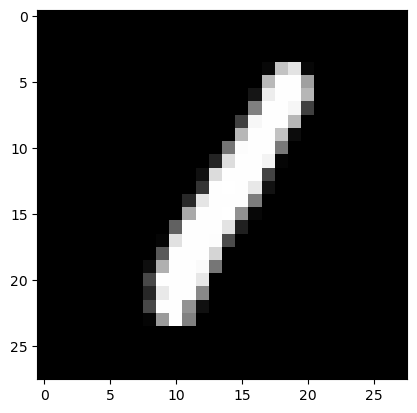

In [28]:
i=5
img=df.iloc[i,1:].values.reshape(28,28)
label=df.iloc[i,0]
plt.imshow(img,cmap='gray')
print("Digit is",label)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(y_test,y_pred)
#sns.heatmap(mat,cmap="Blues")
mat

array([[11,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  8,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  2,  0,  6,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  4,  1],
       [ 0,  2,  0,  0,  2,  0,  0,  3,  0,  7]])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.71      1.00      0.83        17
           2       1.00      0.60      0.75         5
           3       0.83      0.83      0.83        12
           4       0.80      0.80      0.80        10
           5       1.00      0.50      0.67        12
           6       0.86      1.00      0.92         6
           7       0.79      1.00      0.88        11
           8       0.50      0.67      0.57         6
           9       0.70      0.50      0.58        14

    accuracy                           0.79       105
   macro avg       0.82      0.78      0.78       105
weighted avg       0.82      0.79      0.78       105



In [80]:
# we can also do by decision trees,bayesian,multinomial also
# Overall KNN performance is better

NameError: name 'X_test' is not defined

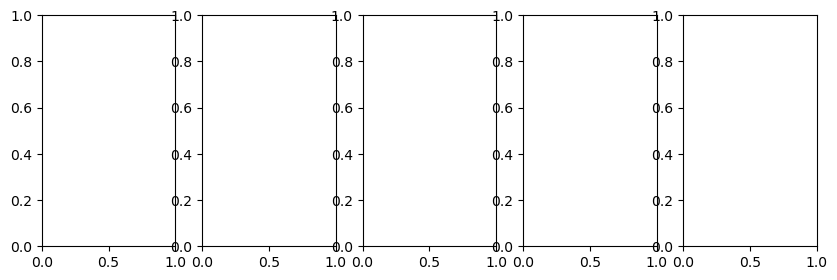

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    axes[i].imshow(X_test[i].reshape(image_shape))
    axes[i].axis('off')

plt.show()